# Probability and Statistics Functions

Numpy and Scipy have been introduced earlier. Both packages contain powerful functionality for performing important computation for the purposes of simulation, probability distributions and statistics operations.

NumPy random number generators are found in the module numpy.random. To import, use numpy and then calling np.random.rand, for example, although there are a number of ways to do this. 

## rand, rand_sample
rand and rand_sample are uniform number generators, i.e. $U(0,1)$ which are identical except that rand takes a variable number of integer inputs - one for each dimension - while random_sample takes a $n$-element tuple. 

To sample $U(a,b), b>a$; multiply the output of the random_sample by $(b-a)$ and add $a$. So the following
$(b-a)\times$random_sample$()$+$a{\sim}U(a,b)$

Example use:

In [4]:
import numpy as np
x=np.random.rand(3,2,4)
print(x) # Exercise run a few times to get structure of array

[[[0.81614945 0.60320949 0.70575929 0.28846666]
  [0.4088345  0.8588043  0.39357721 0.23967106]]

 [[0.64407256 0.68091335 0.35443689 0.43264249]
  [0.43271886 0.71336188 0.49057873 0.34542678]]

 [[0.42587884 0.93476856 0.5228574  0.30553881]
  [0.57596644 0.14965803 0.64242692 0.36806856]]]


numpy.ndarray

### randn and standard_normal
randn and standard_normal $N(0,1)$ are standard normal random number generators. randn, like rand, takes a variable number of integer inputs, and standard_normal takes an $n$-element tuple. Both can be called with no arguments to generate a single standard normal (e.g. randn()). 


### Random numbers don't exist!
Computer simulated random numbers are usually constructed from very complex but ultimately deterministic functions. These are not purely random, but are  pseudo-random. All pseudo-random numbers in NumPy use one core random number generator based on the Mersenne Twister, a generator which can produce a very long series of pseudo-random data before repeating (up to $2^{19937}-1$ non-repeating values). It also provides a much larger number of distributions to choose from. 

### Random Array Functions 1
The function shuffle() randomly reorders the elements of an array (only single element parameter). The original array is changed. 

In [5]:
import random # for using shuffle function
a=[0,1,2,3,4,5,6,7,8,9,10]
type(a)

list

In [6]:
random.shuffle(a) # run this cell a few times

In [7]:
a

[7, 5, 1, 9, 3, 4, 0, 8, 6, 2, 10]

So the original list has changed. 

## Random number generators
Numpy through numpy.random provides an efficient and simple way to produce numbers of specific distributions. Depending on the distribution parameters these take between 0 and 2 inputs. Here are some useful examples for finance applications, ranging from 0 to 2 inputs, as well as a tuple size for the output. 
### binomial
The function binomial(n,p) generates a sample from the Binomial$(n,p)$ distribution. 
binomial(n,p,(𝑎,𝑏)) draws an array of dimension $a$ by $b$ from the Binomial(n, p) distribution.


In [8]:
np.random.binomial(30,0.25) # single variable

9

In [9]:
x=np.random.binomial(30,0.25,(2,3)) # 2 by 3 array of the above distribution
print(x) # or simply x

[[6 2 6]
 [9 7 8]]


In [10]:
np.mean(x) # recall mean is np.

6.333333333333333

There may be hidden precision in the output. 

### uniform
uniform() draws a uniform random variable on (0,1). uniform(low, high) generates a uniform on (l , h). uniform(low, high, (m,n)) generates a $m{\times}n$ array of uniforms on (l , h).

In [11]:
np.random.uniform(0,1) # although the 2 parameters are not required for U(0,1)

0.9424408279857883

In [12]:
np.random.uniform()

0.9747309265091689

In [13]:
np.random.uniform(1,4) # a=1 b=4

1.7712712661722607

In [14]:
x=np.random.uniform(0,1,(2,2))
print(x)

[[0.09747282 0.47932255]
 [0.05420321 0.48829898]]


In [15]:
print(x[0,1]) # use in the normal way for manipulating arrays

0.4793225514930305


### normal
The function normal() draws from a standard Normal (Gaussian) distribution. normal(mu, sigma) generates draws from a Normal with mean $\mu$ and standard deviation $\sigma$. 
normal(mu, sigma, (n,m)) generates a n by m array of the above. normal(mu, sigma) is equivalent to
$\mu+\sigma\phi$ which gives $X{\sim}N(\mu,{\sigma^2})$.

In [16]:
x=np.random.normal(0,1,(10000))
x

array([ 1.74633062,  0.19665257,  0.10611721, ...,  0.43310252,
       -0.51708124, -0.66713171])

In [17]:
np.mean(x)

-0.016566341670056182

**The geometric mean can be calculated using the function stats.gmean() function which can be found in SciPy** The following is needed

from scipy import stats

We haven't said anything about the second moment. Numpy has functions for calculating the variance and standard deviation. If x is a data array then the variance and standard deviation, in turn, are given by 

np.variance(x) 

np.std(x)

In [18]:
np.var(x)

0.9773300651520304

In [19]:
np.std(x)

0.9886000531822919

### lognormal
lognormal() simulates a log-normal distribution with $\mu=0$; $\sigma=1.$
lognormal(mu, sigma, (m,n)) generates a $m{\times}n$ array of Log-Normally distributed data where the underlying Normal distribution has mean parameter $\mu$ and parameter $\sigma$. To use, here is an example

In [20]:
z=np.random.lognormal(0,1,(3,3))
z

array([[ 1.56406724,  1.06198906,  0.61144571],
       [19.95202763,  2.60077642,  0.45517075],
       [ 0.17813299,  0.48089553,  0.08181666]])

### Poisson
poisson() generates a draw from a Poisson distribution with $\lambda=1$. poisson(lambda) generates a draw from a Poisson distribution with expectation $\lambda$. poisson(lambda, (n,m)) generates a $n\times m$ array of draws from a Poisson distribution with expectation $\lambda$.


In [21]:
import numpy as np
np.random.poisson()

0

In [22]:
np.random.poisson(4) #lambda=4

5

In [23]:
x=np.random.poisson(3,(2,2)) # 2 by 2 with expected value=3
print(x,np.mean(x))

[[1 2]
 [3 1]] 1.75


**Seed is better.**
numpy.random.seed is a more useful function for initializing the random number generator, and can be used in one of two ways.  seed() will initialize (or reinitialize) the random number generator using some actual random data provided by the operating system. seed(s) takes a vector of values (can be scalar) to initialize the random number generator at particular state.

In the following sample code, calls to seed() produce different random numbers, since these reinitialize using random data from the computer, while calls to seed(0) produce the same (sequence) of random numbers. seed( s ) is particularly useful for producing simulation studies which are reproducible.

In [24]:
np.random.seed(786) # 786 is my choice 
np.random.normal(0,1,(2,2))

array([[-0.79930737,  1.06550136],
       [-0.24645913,  0.85680645]])

In [25]:
np.random.normal(0,1,(2,2))

array([[-1.50576563, -1.0715346 ],
       [-0.0270803 ,  0.70727793]])

In [26]:
np.random.seed(0)
np.random.normal(0,1,(2,2))

array([[1.76405235, 0.40015721],
       [0.97873798, 2.2408932 ]])

In [27]:
np.random.normal(0,1,(2,2))

array([[ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721]])

**numpy random.random**  This produces random draws from the continuous U(0.0,1.0) distribution

In [28]:
np.random.random(3)

array([0.96366276, 0.38344152, 0.79172504])

**Further note on abbreviation** np.random. as a prefix is still cumbersome. The following can be done to further abbreviate this

In [29]:
np.random.seed(0)
import numpy.random as npr # npr much shorter
npr.normal(0,1,(3,3)) # earlier example 

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885]])

In [30]:
npr.random((2,2)) # shorthand for random.random

array([[0.79172504, 0.52889492],
       [0.56804456, 0.92559664]])

Let's do some plots. Start by generating for different distributions

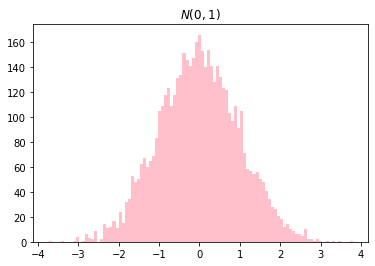

In [31]:
### Standard normals ###
import matplotlib.pyplot as plt
X = npr.standard_normal(5000)
plt.hist(X,bins=100, color='pink')
plt.title('$N(0,1)$')
plt.show()


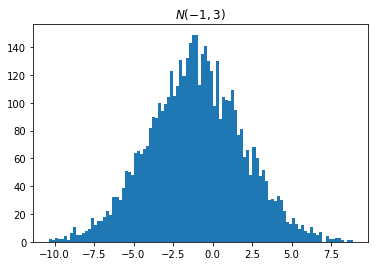

In [32]:
### Normal distribution ###
Y = npr.normal(-1, 3, (5000))
plt.title('$N(-1,3)$')
plt.hist(Y,bins=100)
plt.show()

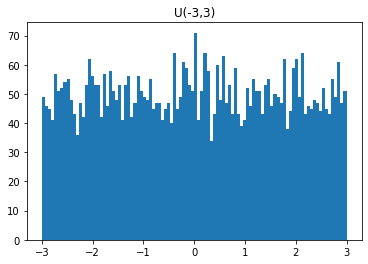

In [36]:
### uniform ###
Z = npr.uniform(-3, 3, (5000)) 
plt.hist(Z,bins=100)
plt.title('U(-3,3)')
plt.show()


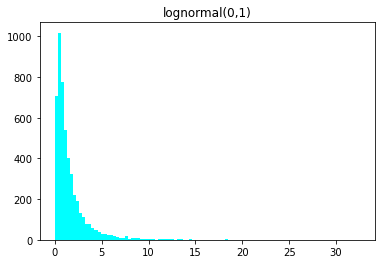

In [37]:

### lognormal ###

W = npr.lognormal(0, 1, (5000))
plt.hist(W,bins=100, color='cyan')
plt.title('lognormal(0,1)')
plt.autoscale(enable=True)
plt.show()

To obtain a cumulative distribution, simply add an extra function argument 
cumulative = True
e.g.

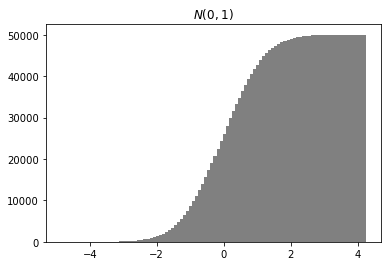

In [38]:
X = npr.standard_normal(50000)
plt.hist(X,bins=100, cumulative = True, color='grey')
plt.title('$N(0,1)$')
plt.show()

### Subplots


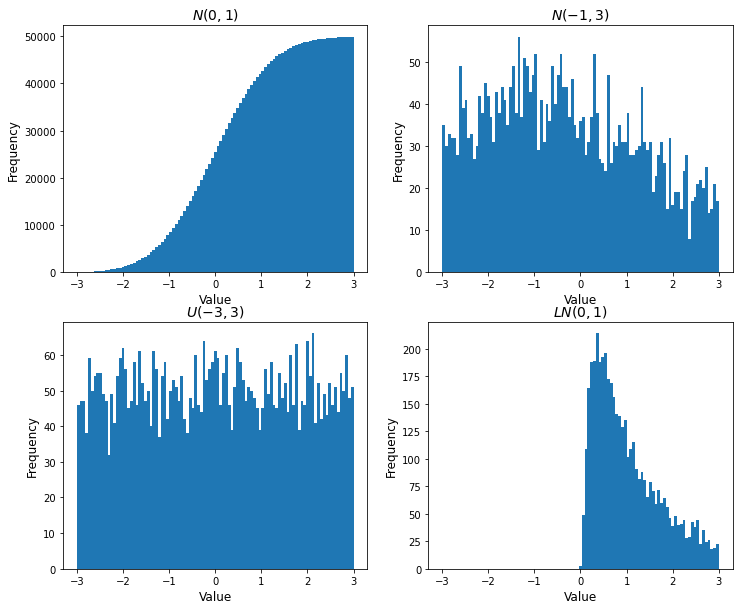

In [39]:
bins = np.linspace(-3,3,100) # define the width of the bins
fig = plt.figure(figsize = (12,10)) # define size of figure 


sub1 = fig.add_subplot(221)
plt.hist(X,bins,cumulative=True)
plt.title('$N(0,1)$', fontsize = 14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

sub2 = fig.add_subplot(222)
plt.hist(Y,bins)
plt.title('$N(-1,3)$', fontsize = 14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

sub3 = fig.add_subplot(223)
plt.hist(Z,bins)
plt.title('$U(-3,3)$', fontsize = 14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

sub4 = fig.add_subplot(224)
plt.hist(W,bins)
plt.title('$LN(0,1)$', fontsize = 14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()